<a href="https://colab.research.google.com/github/rajitk13/csi-team-3-project/blob/main/one_month_chandigarh_lasso_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/drive/MyDrive/celebal internship/air quality index/chandigarh_aqi/one_month_chandigarh.csv')
df.head()

,aqi,co,datetime,no2,o3,pm10,pm25,so2,timestamp_local,timestamp_utc,ts
0,180,300.0,2023-07-03:18,14.0,91.0,125.0,78.0,49.0,2023-07-03T23:30:00,2023-07-03T18:00:00,1688407200
1,181,319.7,2023-07-03:17,18.0,94.3,125.3,79.0,48.7,2023-07-03T22:30:00,2023-07-03T17:00:00,1688403600
2,183,339.3,2023-07-03:16,22.0,97.7,125.7,80.0,48.3,2023-07-03T21:30:00,2023-07-03T16:00:00,1688400000
3,184,359.0,2023-07-03:15,26.0,101.0,126.0,81.0,48.0,2023-07-03T20:30:00,2023-07-03T15:00:00,1688396400
4,177,299.7,2023-07-03:14,18.3,125.0,122.0,76.0,41.7,2023-07-03T19:30:00,2023-07-03T14:00:00,1688392800


<Axes: >

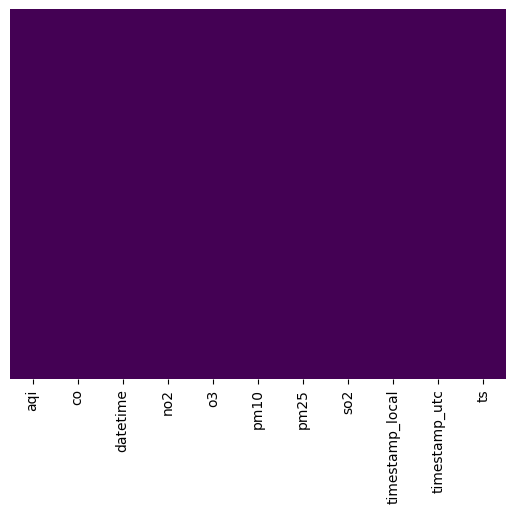

In [3]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
df=df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   aqi              721 non-null    int64  
 1   co               721 non-null    float64
 2   datetime         721 non-null    object 
 3   no2              721 non-null    float64
 4   o3               721 non-null    float64
 5   pm10             721 non-null    float64
 6   pm25             721 non-null    float64
 7   so2              721 non-null    float64
 8   timestamp_local  721 non-null    object 
 9   timestamp_utc    721 non-null    object 
 10  ts               721 non-null    int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 62.1+ KB


In [6]:
y=df.iloc[:,0] ## dependent features
y

0      180
1      181
2      183
3      184
4      177
      ... 
716    133
717    121
718    117
719    113
720    110
Name: aqi, Length: 721, dtype: int64

In [7]:
df.columns

Index(['aqi', 'co', 'datetime', 'no2', 'o3', 'pm10', 'pm25', 'so2',
       'timestamp_local', 'timestamp_utc', 'ts'],
      dtype='object')

In [8]:
X=df[['co', 'datetime', 'no2', 'o3', 'pm10', 'pm25', 'so2',
       'timestamp_local', 'timestamp_utc', 'ts']] ## independent features

In [9]:
X

,co,datetime,no2,o3,pm10,pm25,so2,timestamp_local,timestamp_utc,ts
0,300.0,2023-07-03:18,14.0,91.0,125.0,78.00,49.0,2023-07-03T23:30:00,2023-07-03T18:00:00,1688407200
1,319.7,2023-07-03:17,18.0,94.3,125.3,79.00,48.7,2023-07-03T22:30:00,2023-07-03T17:00:00,1688403600
2,339.3,2023-07-03:16,22.0,97.7,125.7,80.00,48.3,2023-07-03T21:30:00,2023-07-03T16:00:00,1688400000
3,359.0,2023-07-03:15,26.0,101.0,126.0,81.00,48.0,2023-07-03T20:30:00,2023-07-03T15:00:00,1688396400
4,299.7,2023-07-03:14,18.3,125.0,122.0,76.00,41.7,2023-07-03T19:30:00,2023-07-03T14:00:00,1688392800
...,...,...,...,...,...,...,...,...,...,...
716,232.7,2023-06-03:22,12.7,36.7,68.7,47.67,14.0,2023-06-04T03:30:00,2023-06-03T22:00:00,1685829600
717,251.0,2023-06-03:21,13.0,45.0,62.0,43.00,18.0,2023-06-04T02:30:00,2023-06-03T21:00:00,1685826000
718,274.0,2023-06-03:20,23.7,47.0,61.3,41.67,22.0,2023-06-04T01:30:00,2023-06-03T20:00:00,1685822400
719,297.0,2023-06-03:19,34.3,49.0,60.7,40.33,26.0,2023-06-04T00:30:00,2023-06-03T19:00:00,1685818800


In [10]:
X.isnull()

,co,datetime,no2,o3,pm10,pm25,so2,timestamp_local,timestamp_utc,ts
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
716,False,False,False,False,False,False,False,False,False,False
717,False,False,False,False,False,False,False,False,False,False
718,False,False,False,False,False,False,False,False,False,False
719,False,False,False,False,False,False,False,False,False,False


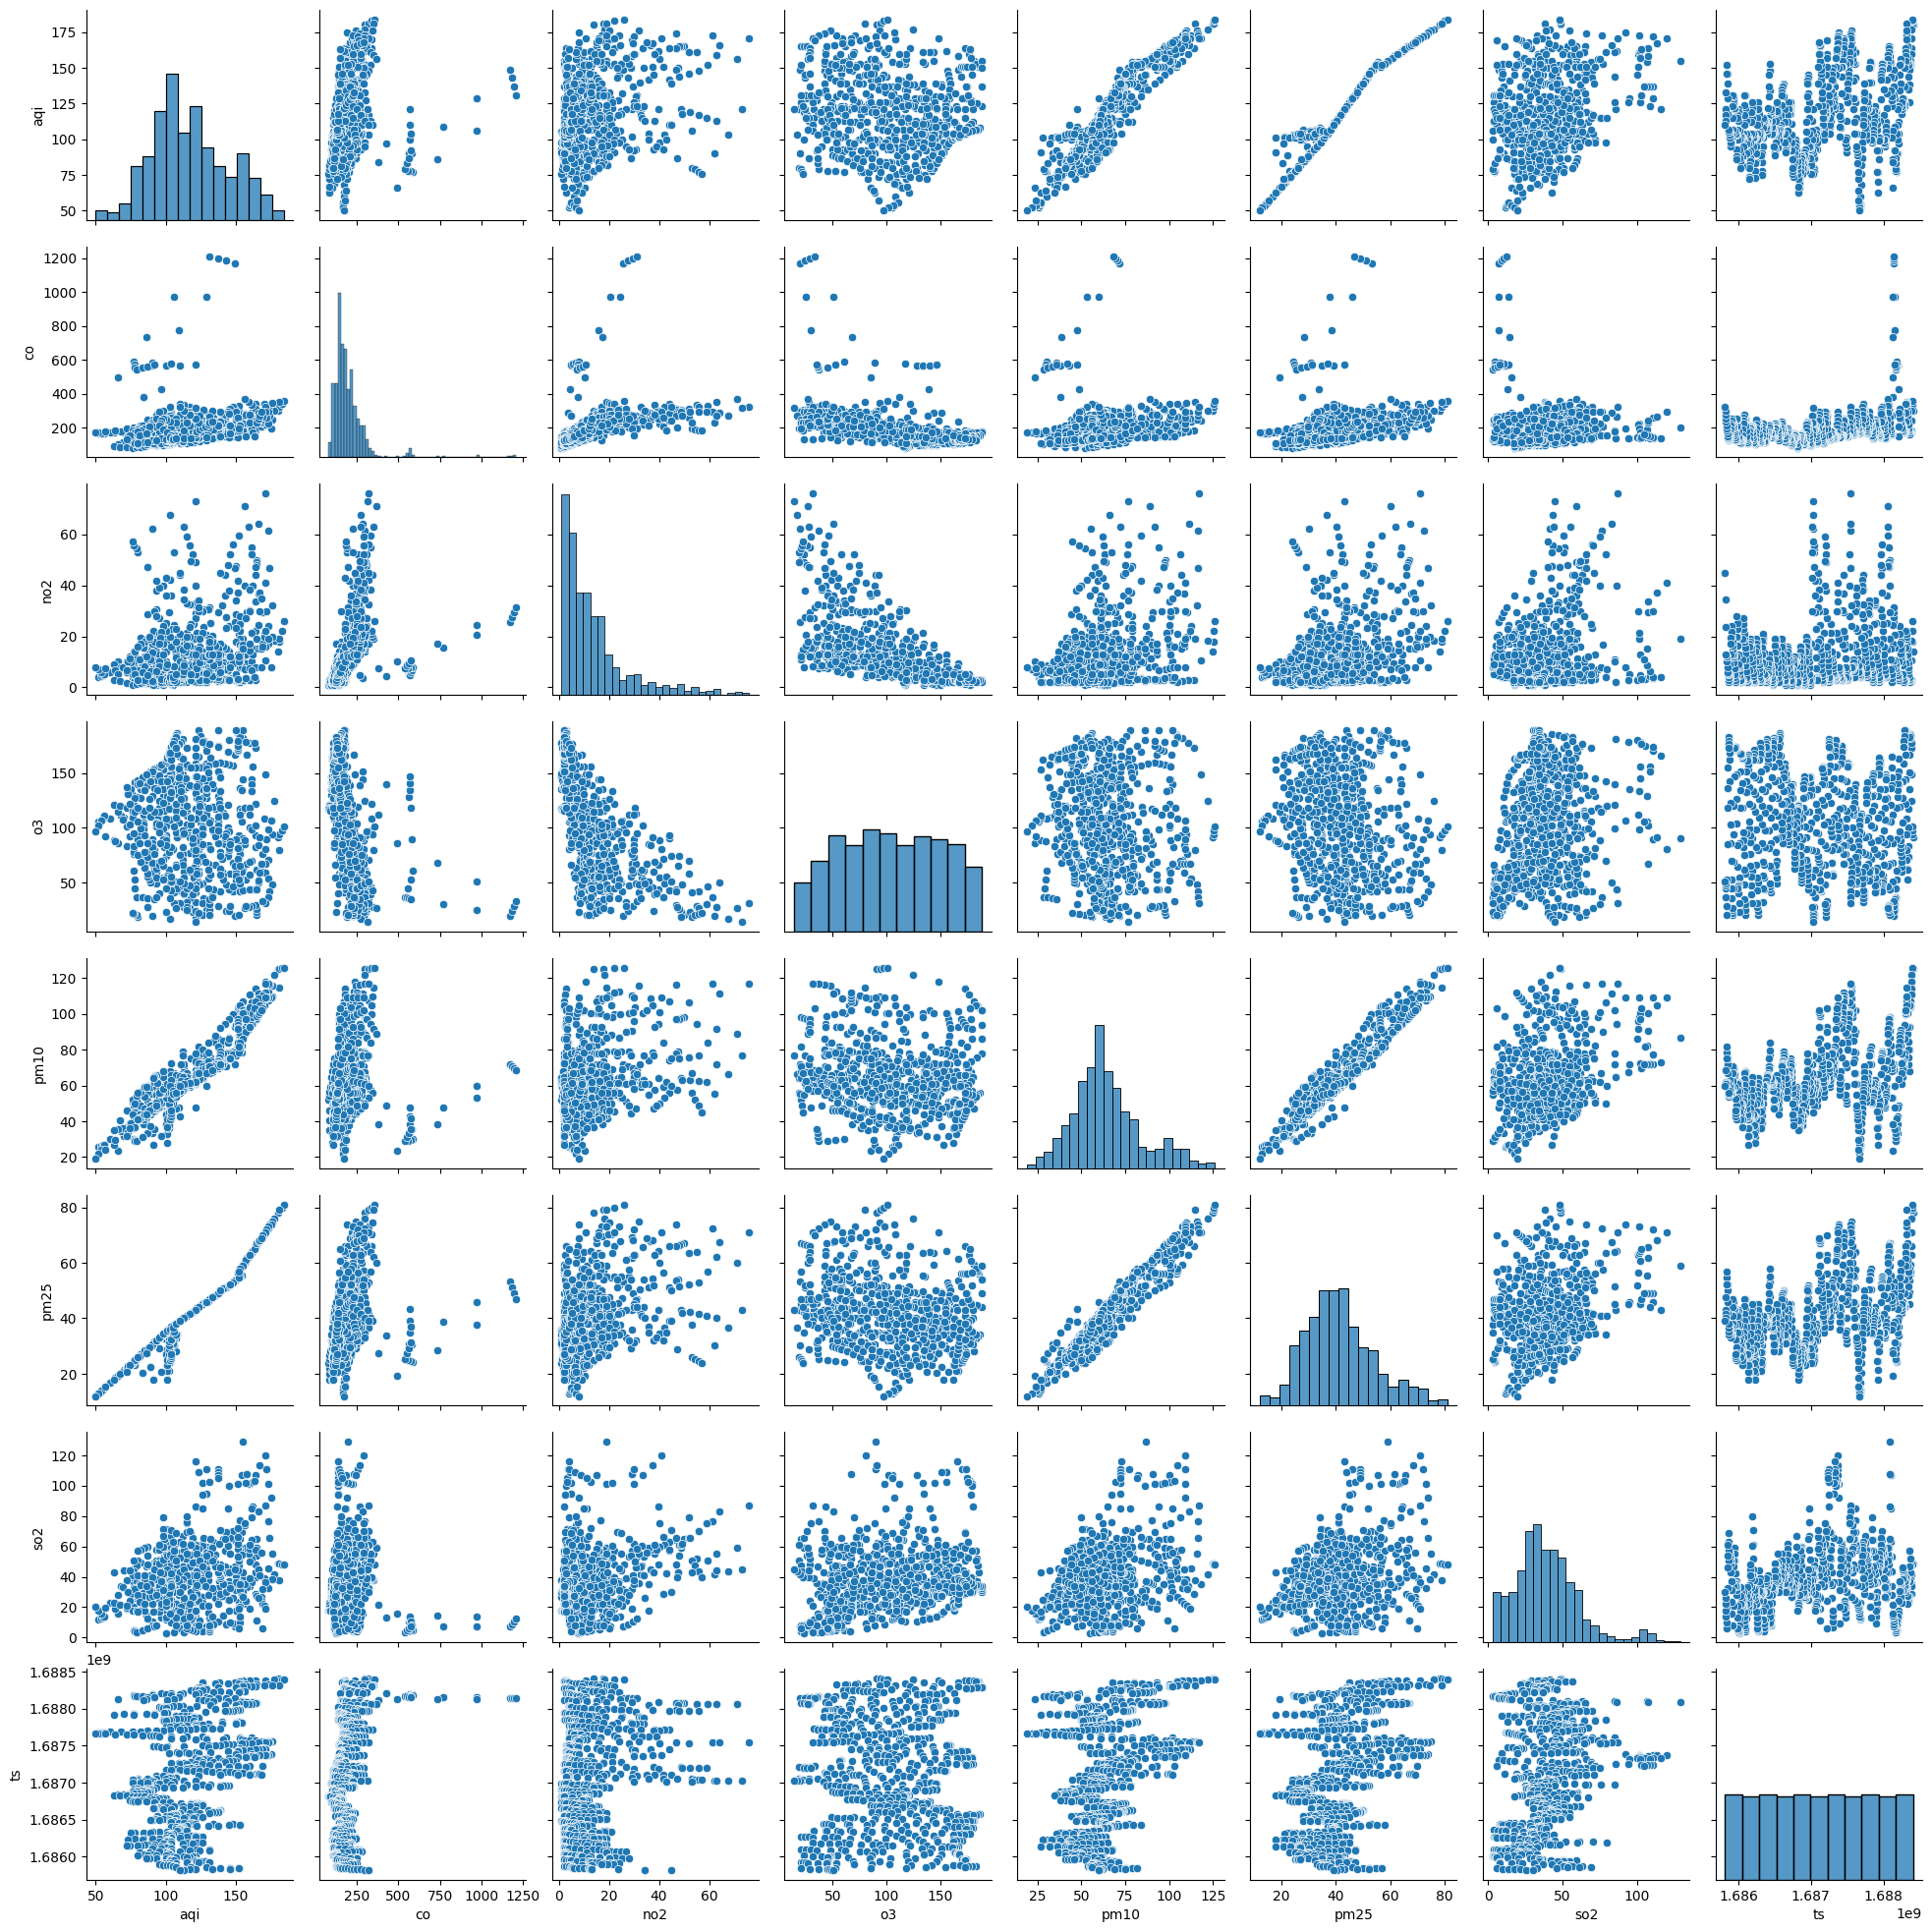

In [11]:
sns.pairplot(df)

In [12]:
df.corr()

<ipython-input-12-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,aqi,co,no2,o3,pm10,pm25,so2,ts
aqi,1.000000,0.211563,0.292125,-0.168394,0.932850,0.978242,0.321557,0.340845
co,0.211563,1.000000,0.394902,-0.455129,0.105465,0.232951,-0.154503,0.357329
no2,0.292125,0.394902,1.000000,-0.660433,0.285127,0.329752,0.220242,0.175824
o3,-0.168394,-0.455129,-0.660433,1.000000,-0.096013,-0.219116,0.220240,-0.077593
pm10,0.932850,0.105465,0.285127,-0.096013,1.000000,0.958027,0.355448,0.352316
pm25,0.978242,0.232951,0.329752,-0.219116,0.958027,1.000000,0.328855,0.378213
so2,0.321557,-0.154503,0.220242,0.220240,0.355448,0.328855,1.000000,0.205601
ts,0.340845,0.357329,0.175824,-0.077593,0.352316,0.378213,0.205601,1.000000


<ipython-input-13-eb5df078eb6c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


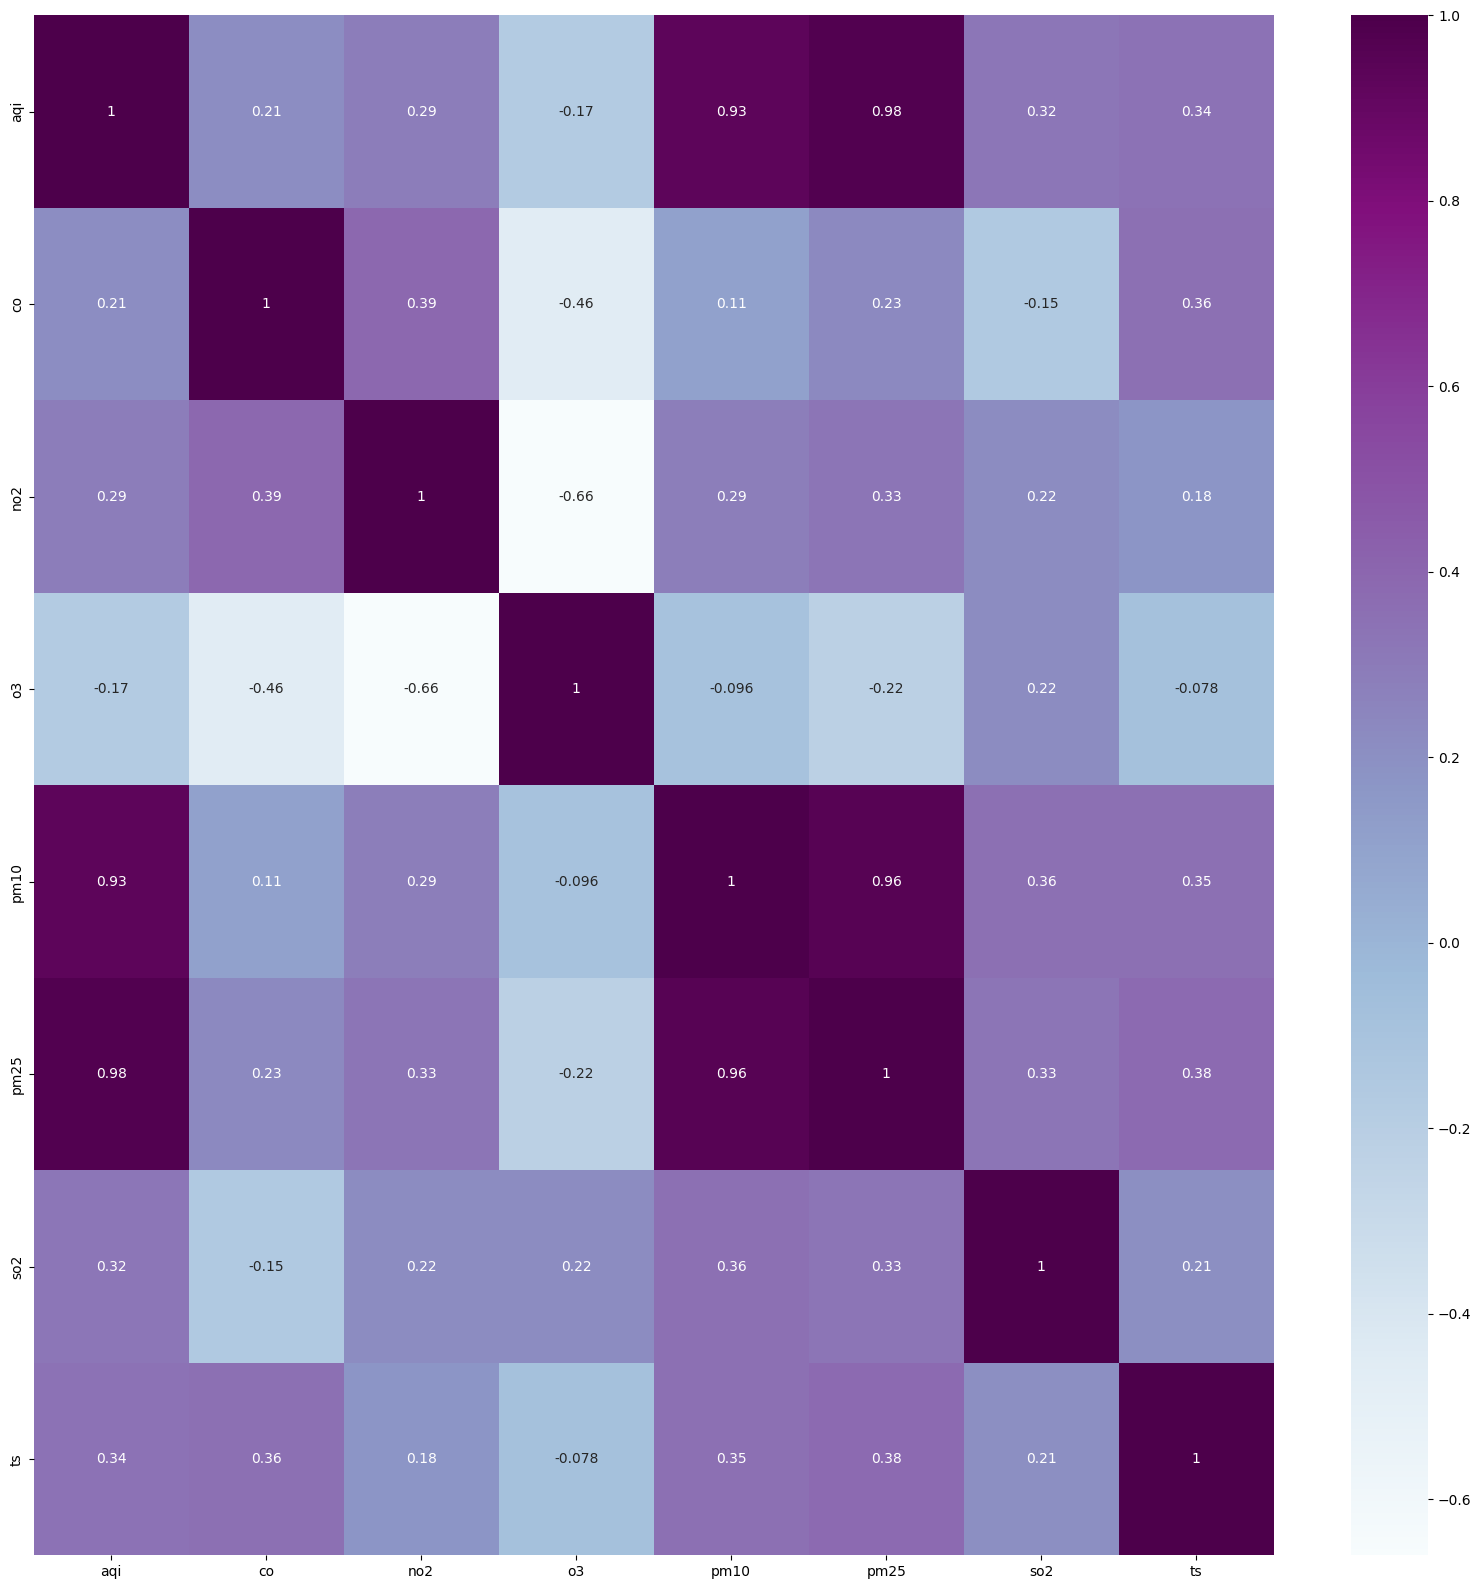

In [13]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="BuPu")

In [14]:
corrmat.index

Index(['aqi', 'co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'ts'], dtype='object')

In [15]:
X = X.drop(['datetime'],axis=1)
X = X.drop(['timestamp_local'],axis=1)
X = X.drop(['timestamp_utc'],axis=1)
X.head()

,co,no2,o3,pm10,pm25,so2,ts
0,300.0,14.0,91.0,125.0,78.0,49.0,1688407200
1,319.7,18.0,94.3,125.3,79.0,48.7,1688403600
2,339.3,22.0,97.7,125.7,80.0,48.3,1688400000
3,359.0,26.0,101.0,126.0,81.0,48.0,1688396400
4,299.7,18.3,125.0,122.0,76.0,41.7,1688392800


In [16]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

[2.94427634e-03 2.80449070e-03 1.81825211e-02 3.85276023e-01
 5.78192254e-01 3.61819150e-04 1.22386155e-02]


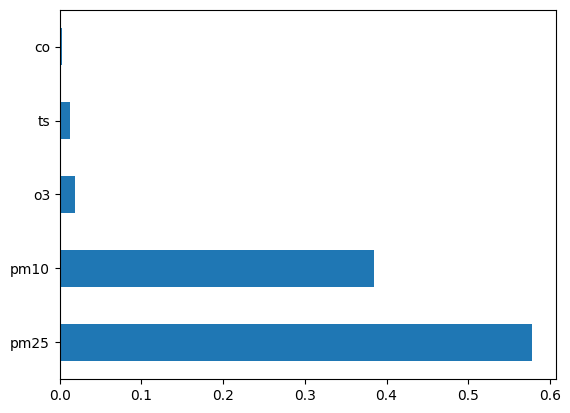

In [17]:
X.head()

print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [20]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-32.83430251702096


In [21]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.726e+03, tolerance: 3.751e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.607e+03, tolerance: 3.634e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.918e+03, tolerance: 4.249e

{'alpha': 0.01}
-32.920367102936424


<ipython-input-22-62201203c3f4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<Axes: xlabel='aqi', ylabel='Density'>

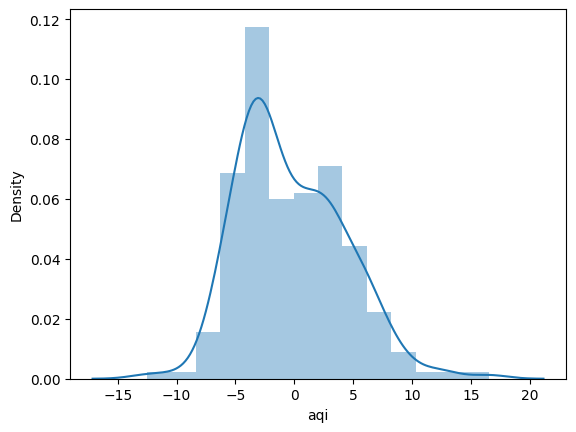

In [22]:
prediction=lasso_regressor.predict(X_test)
sns.distplot(y_test-prediction)

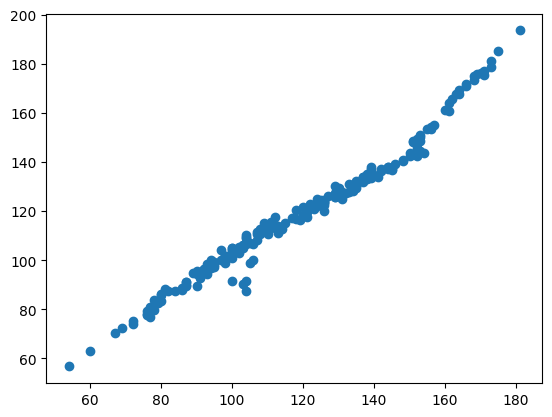

In [23]:
plt.scatter(y_test,prediction)

In [24]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 3.724825046744671
MSE: 20.21644330305916
RMSE: 4.4962699321836945
